In [1]:
import numpy as np
import pandas as pd

In [2]:
OUT_SIZE = 20
num_classes = 1
path = "../garbage_detection/"

In [3]:
df1 = pd.read_csv(path+'train_labels.csv')
df2 = pd.read_csv(path+'test_labels.csv')

In [4]:
df = pd.concat([df1, df2])
df

,filename,width,height,class,xmin,ymin,xmax,ymax
0,9e7858f8-6799-11e5-ba3c-40f2e96c8ad8.jpg,400,265,garbage,4.000000,112.000000,396.000000,253.000000
1,398faec8-6799-11e5-8dc4-40f2e96c8ad8.jpg,537,431,garbage,92.000000,310.000000,177.000000,389.000000
2,398faec8-6799-11e5-8dc4-40f2e96c8ad8.jpg,537,431,garbage,327.000000,398.000000,414.000000,430.000000
3,398faec8-6799-11e5-8dc4-40f2e96c8ad8.jpg,537,431,garbage,165.000000,130.000000,200.000000,165.000000
4,398faec8-6799-11e5-8dc4-40f2e96c8ad8.jpg,537,431,garbage,314.000000,271.000000,383.000000,329.000000
...,...,...,...,...,...,...,...,...
15,ba01cf5a-679e-11e5-b0d3-40f2e96c8ad8.jpg,636,546,garbage,103.000000,306.000000,612.000000,527.000000
16,bbd22d48-679e-11e5-b0d3-40f2e96c8ad8.jpg,618,430,garbage,117.000000,185.000000,534.000000,423.000000
17,be03cab8-679e-11e5-b0d3-40f2e96c8ad8.jpg,560,315,garbage,214.000000,84.000000,501.000000,227.000000
18,c3352676-679e-11e5-b0d3-40f2e96c8ad8.jpg,430,323,garbage,123.000000,134.000000,325.000000,253.000000


In [5]:
lbls = {}

In [6]:
for i in df.values:
    filename,width,height,label,xmin,ymin,xmax,ymax = i

    wid_r = OUT_SIZE/width
    hgt_r = OUT_SIZE/height

    a_xmin = round(wid_r*xmin)
    a_xmax = round(wid_r*xmax)
    a_ymin = round(hgt_r*ymin)
    a_ymax = round(hgt_r*ymax)
    
    if filename not in lbls:
        lbls[filename] = np.zeros((OUT_SIZE, OUT_SIZE, num_classes), dtype=np.uint8)
        
    lbls[filename][a_ymin:a_ymax,a_xmin:a_xmax] = 1

In [7]:
import pickle

In [8]:
with open('labels.pickle', 'wb') as f:
    pickle.dump(lbls, f)

In [31]:
import cv2
import matplotlib.pyplot as plt

In [21]:
import json5

In [27]:
with open("export_18.json","r") as f:
    data = json5.load(f)

In [30]:
data[0]

{'imagename': 'cede6f16-67a1-11e5-b4c6-40f2e96c8ad8.jpg',
 'width': 480,
 'height': 360,
 'type': 'waste',
 'miny': 109,
 'minx': 105,
 'maxy': 356,
 'maxx': 477,
 'vector_format': ['x', 'y'],
 'vector': [[150, 210],
  [162, 191],
  [200, 156],
  [236, 130],
  [283, 121],
  [344, 109],
  [378, 120],
  [440, 145],
  [458, 165],
  [467, 194],
  [475, 217],
  [477, 283],
  [439, 293],
  [393, 299],
  [392, 312],
  [366, 314],
  [351, 319],
  [337, 307],
  [324, 317],
  [319, 331],
  [297, 342],
  [274, 341],
  [264, 322],
  [239, 321],
  [222, 332],
  [200, 328],
  [210, 347],
  [213, 356],
  [191, 356],
  [181, 338],
  [172, 330],
  [171, 315],
  [180, 301],
  [173, 286],
  [165, 284],
  [149, 271],
  [134, 255],
  [136, 243],
  [112, 235],
  [105, 216],
  [119, 206],
  [137, 204]]}

In [102]:
img = cv2.imread(data[0]['imagename'])
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

In [93]:
mask = np.zeros((data[0]['height'],data[0]['width'],1), dtype=np.uint8)

In [94]:
img.shape,mask.shape

((360, 480, 3), (360, 480, 1))

In [95]:
vector = np.asarray(data[0]['vector'])

In [96]:
mask = cv2.fillPoly(mask, [vector], 1)

In [97]:
rm = cv2.resize(mask, (20,20))

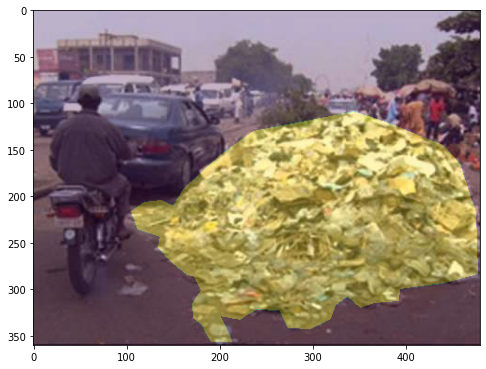

In [111]:
plt.figure(figsize=(8, 8), frameon=False)
plt.imshow(img)
plt.imshow(mask, alpha=0.3)
plt.show()

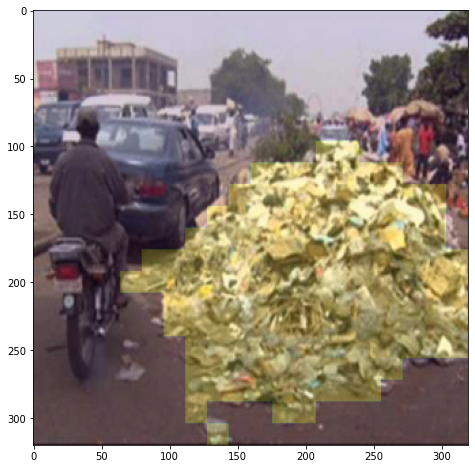

In [104]:
imm = cv2.resize(img, (320, 320))
imm = imm/255
pred = rm
mkk = np.zeros(imm.shape[:2], dtype=np.float32)
y_grid = imm.shape[0]//pred.shape[0]
x_grid = imm.shape[1]//pred.shape[1]
idy = 0
for y in range(0, imm.shape[0], y_grid):
    idx = 0
    for x in range(0, imm.shape[1], x_grid):
        try:
            mkk[y:y+y_grid, x:x+x_grid] = pred[idy, idx]
        except IndexError:
            pass
        idx+=1
    idy+=1
plt.figure(figsize=(8, 8), frameon=False)
plt.imshow(imm)
plt.imshow(mkk, alpha=0.2)#, cmap='PuRd')
plt.show()